# PETE 2061 Lab 7 workbook (Functions)

## THIS IS DUE BY 11:59 PM on Monday, Oct 21

<a id='variables'></a>
## Decline Curve Analysis
Well A flows with an initial flow rate ($q_i$) of 6,000 bopd (barrels of oil per day), and has a continuous initial decline rate ($D_i$) of 0.001 per day. The well follows the hyperbolic decline for the first 5 years and switches over to exponential decline after 5 years. The well then declines exponentially for 5 more years, to make a total production time of 10 years. 
* Implement two functions-- one for the hyperbolic decline and another for the exponential decline
* Use a for loop. Do not vectorize!
* Call the hyperbolic decline function if time is less than 5 years, and the exponential decline otherwise.
* How will you get the initial rate to use during the exponential decline? (Hint: this will be the rate on the last day of the 5th year. The first day of the 6th year will be day 1 for the exponential decline)
<br>

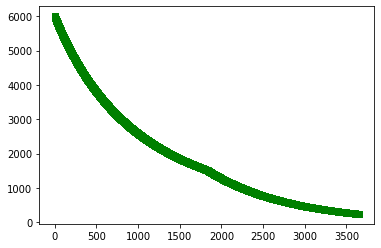

In [3]:
import numpy as np
import matplotlib.pyplot as plt

q_i = 6000
D_i = 0.001
b = 0.4

timeVec = np.arange(3650)  # sets timeVec to a vector of [0,1,2,...,20]
rate = np.zeros(timeVec.shape)
for i in timeVec:
    if(i<=1824):
        rate[i]=q_i/((1+b*D_i*timeVec[i])**(1/b))
    elif(i>1824):
        rate[i]=rate[1824]*np.exp(-D_i*timeVec[i-1824])
plt.plot(timeVec, rate, "g-s")
plt.show()

## Extra Credit
For an extra credit of up to 20% of the total value of this lab. 
* Instead of creating two separate functions for the hyperbolic decline and exponential declines, create only one function called "arpsDecline()", and from the number of arguments to this function, determine which function to call. (Hint: I discussed this in the Lab 7 Jupyter notebook last week)
* Can you vectorize the implementation of this algorithm, and eliminate the for loop?

Hyperbolic:


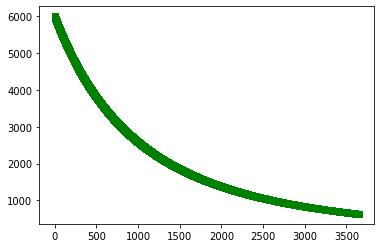

Exponential:


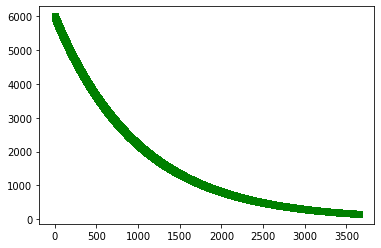

In [22]:
def arpsDecline(*param):
    timeVec=np.arange(3650)
    rate=np.zeros(timeVec.shape)
    if len(param)==2:
        q_i=param[0]
        D_i=param[1]
        rate=q_i*np.exp(-D_i*timeVec)
        plt.plot(timeVec, rate, "g-s")
        print("Exponential:")
        plt.show()
    elif len(param)==3:
        q_i=param[0]
        D_i=param[1]
        b=param[2]
        rate=q_i/((1+b*D_i*timeVec)**(1/b))
        plt.plot(timeVec, rate, "g-s")
        print("Hyperbolic:")
        plt.show()
arpsDecline(6000, .001, .4)
arpsDecline(6000, .001)